# MONDAY 27TH OCTOBER, 2025
## ML PROJECT

In [1]:
#importing the libraries
import pandas as pd #for loading datasets
import numpy as np #for numerical calculations
import matplotlib.pyplot as plt #for plotting graphs 
import seaborn as sns #for Statistical data visualization
from scipy import stats #for statistical functions statistical infrencing
from statsmodels.formula.api import ols #for performing OLS regression linear regression
from statsmodels.stats.outliers_influence import variance_inflation_factor #checking multcolinearity
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler #for processing data before ML
from sklearn.model_selection import train_test_split, GridSearchCV #for splitting data into training and testing sets and to get the best model parameters
from sklearn.linear_model import LinearRegression, Ridge, Lasso #for linear regression models
from sklearn.tree import DecisionTreeRegressor #for decision tree regression model
from sklearn.ensemble import RandomForestRegressor #for ensemble regression models
import statsmodels.api as sm

In [2]:
#load dataset 
house_prices_data = pd.read_csv(r"house_prices_dataset.csv")
house_prices_data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,year_built,year_renovated,zipcode,lat,long,price
0,3,1,2803,1153,1,0,0,3,9,2003,0,98001,47.660671,-121.785347,835016.23
1,5,3,783,9762,1,0,2,4,4,2019,0,98003,47.681937,-122.151515,326073.09
2,3,3,3412,2842,2,0,3,4,9,1961,1962,98002,47.182798,-121.792089,1025404.09
3,2,3,2222,9020,2,1,2,4,4,2008,1962,98004,47.440995,-121.871224,758764.79
4,4,1,4713,1584,2,0,3,4,5,1987,0,98005,47.701306,-122.416623,1314784.23


In [3]:
house_prices_data['waterfront'].value_counts()  

waterfront
0    893
1    107
Name: count, dtype: int64

In [4]:
house_prices_data['view'].value_counts()

view
1    265
0    259
3    250
2    226
Name: count, dtype: int64

In [5]:
house_prices_data['condition'].value_counts()

condition
5    216
2    207
4    199
1    190
3    188
Name: count, dtype: int64

In [6]:
house_prices_data['grade'].value_counts()

grade
12    111
1      95
3      91
10     90
8      86
4      85
5      80
9      80
6      76
11     75
7      72
2      59
Name: count, dtype: int64

In [7]:
#drop zipcode column
house_prices_data = house_prices_data.drop(['zipcode'], axis=1)
house_prices_data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,year_built,year_renovated,lat,long,price
0,3,1,2803,1153,1,0,0,3,9,2003,0,47.660671,-121.785347,835016.23
1,5,3,783,9762,1,0,2,4,4,2019,0,47.681937,-122.151515,326073.09
2,3,3,3412,2842,2,0,3,4,9,1961,1962,47.182798,-121.792089,1025404.09
3,2,3,2222,9020,2,1,2,4,4,2008,1962,47.440995,-121.871224,758764.79
4,4,1,4713,1584,2,0,3,4,5,1987,0,47.701306,-122.416623,1314784.23


# TUESDAY 28TH OCTOBER, 2025
# Explaratory data analysis (EDA)
 1 price distribution

In [8]:
#general statistics
house_prices_data.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,year_built,year_renovated,lat,long,price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2.988000,2.038000,2792.998000,5447.602000,1.501000,0.107000,1.467000,3.044000,6.651000,1985.746000,431.076000,47.443683,-122.009919,8.358796e+05
std,1.412746,0.819285,1288.747969,2614.572404,0.500249,0.309268,1.126135,1.424814,3.548773,20.809385,819.312098,0.198316,0.292534,3.271162e+05
min,1.000000,1.000000,600.000000,1001.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1950.000000,0.000000,47.100252,-122.497067,2.075845e+05
25%,2.000000,1.000000,1652.750000,3103.500000,1.000000,0.000000,0.000000,2.000000,4.000000,1968.000000,0.000000,47.275159,-122.259953,5.527969e+05
50%,3.000000,2.000000,2787.500000,5464.500000,2.000000,0.000000,1.000000,3.000000,7.000000,1986.000000,0.000000,47.450923,-122.024822,8.460296e+05
75%,4.000000,3.000000,3921.500000,7754.500000,2.000000,0.000000,2.250000,4.000000,10.000000,2004.000000,0.000000,47.609755,-121.748543,1.131182e+06
max,5.000000,3.000000,4996.000000,9992.000000,2.000000,1.000000,3.000000,5.000000,12.000000,2021.000000,2021.000000,47.798749,-121.500636,1.476859e+06


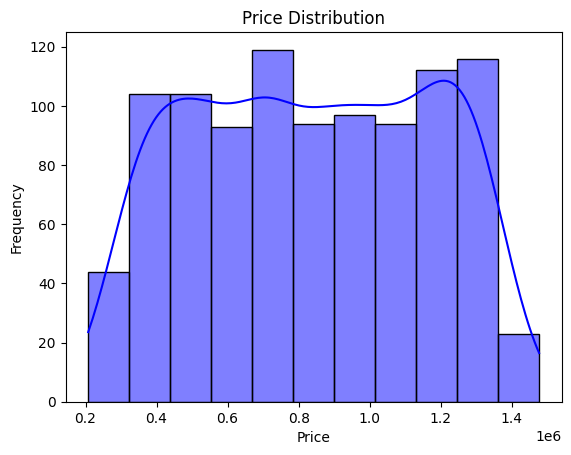

In [9]:
# Price distribution
sns.histplot(data=house_prices_data, x="price", color="blue", kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

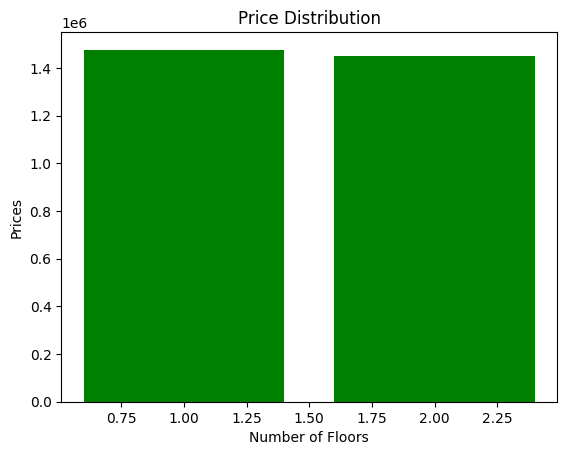

In [10]:
#does the number of floors influence the price of the houses?
plt.bar(data=house_prices_data, x='floors', height='price', color='green')
plt.title("Price Distribution")
plt.xlabel("Number of Floors")
plt.ylabel("Prices")
plt.show()


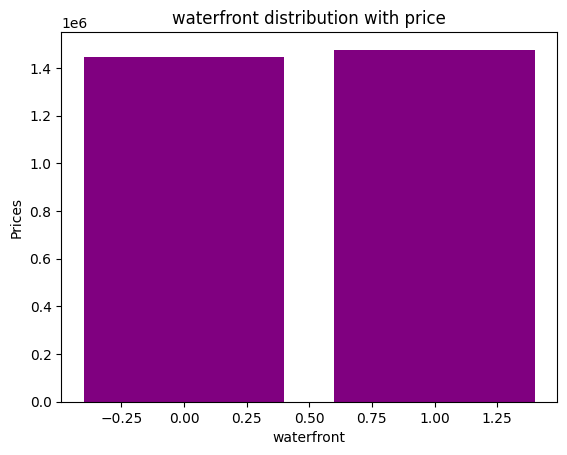

In [11]:
#does the number of floors influence the price of the houses?
plt.bar(data=house_prices_data, x='waterfront', height='price', color='purple')
plt.title("waterfront distribution with price")
plt.xlabel("waterfront")
plt.ylabel("Prices")
plt.show()


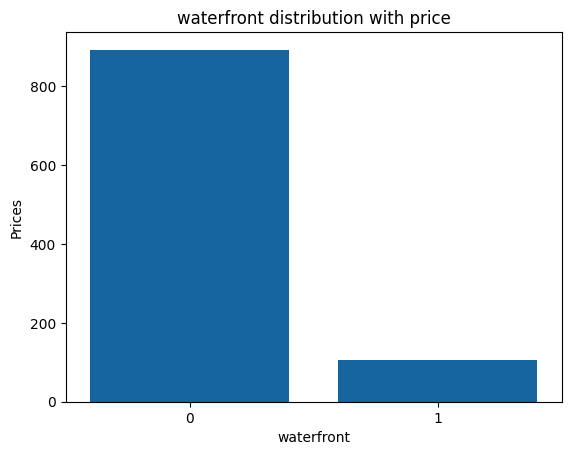

In [12]:
sns.countplot(data=house_prices_data, x="waterfront", color="#0069b4")
plt.title("waterfront distribution with price")
plt.xlabel("waterfront")
plt.ylabel("Prices")
plt.show()

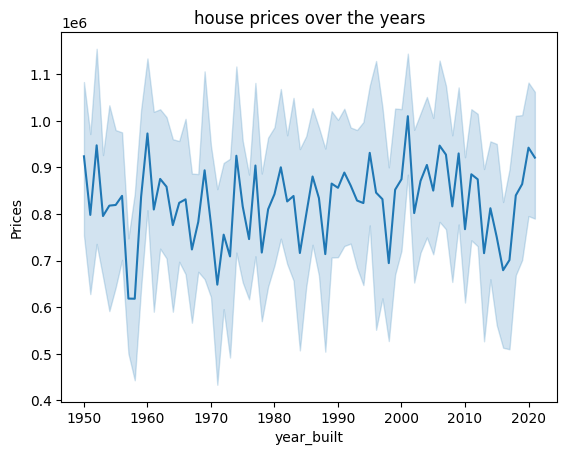

In [13]:
sns.lineplot(data=house_prices_data, x="year_built", y="price")
plt.title("house prices over the years")
plt.xlabel("year_built")
plt.ylabel("Prices")
plt.show()

## correlation analysis
 -relationship between the independent variables and the dependent vairiables 
#### interprating correlation :
   - perfect correlation = 1
   - no correlation = 0
   - strong positive correltaion is between 0.5 and 1
   - strong negative correlation is between -0.5 and -1


In [14]:
#correlation analysis 
correlations=house_prices_data.corr()
print(correlations)

                bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
bedrooms        1.000000  -0.003930    -0.020278 -0.028367 -0.015563   
bathrooms      -0.003930   1.000000     0.030190  0.002061  0.043870   
sqft_living    -0.020278   0.030190     1.000000 -0.014612  0.008787   
sqft_lot       -0.028367   0.002061    -0.014612  1.000000  0.014753   
floors         -0.015563   0.043870     0.008787  0.014753  1.000000   
waterfront      0.044181   0.051097    -0.017256 -0.002951  0.041364   
view            0.009189   0.048013     0.055540 -0.100164  0.046257   
condition      -0.016148   0.049160     0.024721  0.021185 -0.007084   
grade           0.015536  -0.011960     0.004750  0.007995  0.029799   
year_built     -0.028739   0.012309     0.040945  0.013263 -0.010553   
year_renovated -0.049568  -0.018157    -0.024732  0.033545 -0.017841   
lat             0.036425  -0.012870    -0.038860 -0.019825 -0.021462   
long           -0.014820  -0.009914    -0.017699  0.135227  0.01

<Axes: >

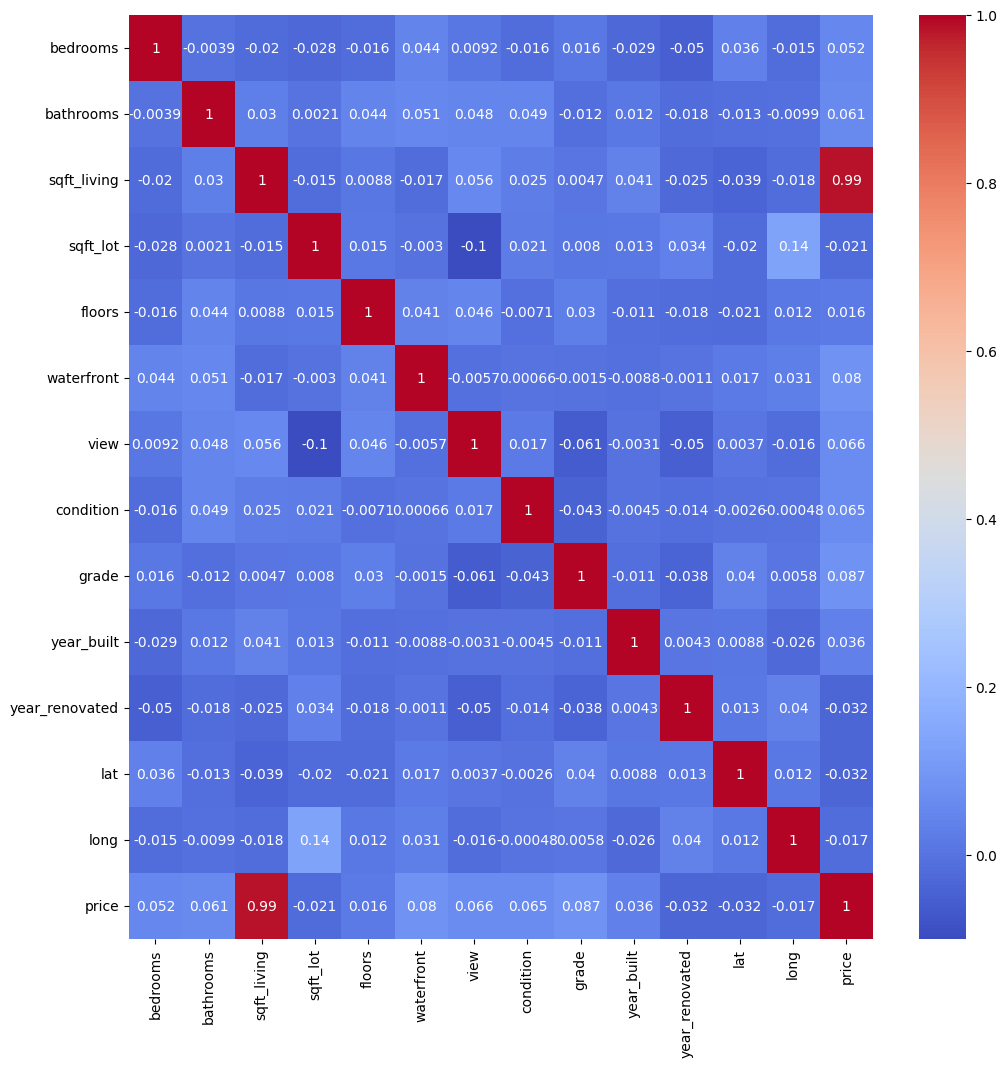

In [15]:
#sns heatmap
plt.figure(figsize=(12,12))
sns.heatmap(data=correlations, cmap="coolwarm", annot=True)

####  hence there is no major correlation between independent variables

### Variance inflation factor
- high vif = multicorlinearity 
- vif can be thought of as a measure of multicorlinearity(relationship between independent variables)
- multicorlinearity of less than 5 is accepted but more than 5 is not and more than 10 is worst

In [16]:
y = house_prices_data['price']
x = house_prices_data.drop(['price'],axis = 1)
x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,year_built,year_renovated,lat,long
0,3,1,2803,1153,1,0,0,3,9,2003,0,47.660671,-121.785347
1,5,3,783,9762,1,0,2,4,4,2019,0,47.681937,-122.151515
2,3,3,3412,2842,2,0,3,4,9,1961,1962,47.182798,-121.792089
3,2,3,2222,9020,2,1,2,4,4,2008,1962,47.440995,-121.871224
4,4,1,4713,1584,2,0,3,4,5,1987,0,47.701306,-122.416623


In [17]:
vif = variance_inflation_factor

In [18]:
x = add_constant(x)
vif_data = pd.DataFrame()
vif_data['FEATURE'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif_data.head()


,FEATURE,VIF
0,const,245124.428644
1,bedrooms,1.008525
2,bathrooms,1.010433
3,sqft_living,1.009111
4,sqft_lot,1.031680


In [19]:
print (vif_data)

           FEATURE            VIF
0            const  245124.428644
1         bedrooms       1.008525
2        bathrooms       1.010433
3      sqft_living       1.009111
4         sqft_lot       1.031680
5           floors       1.008315
6       waterfront       1.008007
7             view       1.024047
8        condition       1.006046
9            grade       1.010532
10      year_built       1.004037
11  year_renovated       1.010107
12             lat       1.006233
13            long       1.022586


#### hence there is no multicorlinearity as all are 1


### Hypothesis testing using anova
- checking for significance of independent variables in relation to dependent variables
- ols to fit our model

In [20]:
house_prices_data.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'year_built',
       'year_renovated', 'lat', 'long', 'price'],
      dtype='object')

In [21]:
formula = 'price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + year_built + year_renovated + lat + long + C(waterfront) + C(view) + C(grade)'
lm = ols(formula, house_prices_data).fit()
table = sm.stats.anova_lm(lm, typ=2)
table

,sum_sq,df,F,PR(>F)
C(waterfront),9.147281e+11,1.0,1559.396621,1.834002e-204
C(view),1.874444e+10,3.0,10.651624,6.805969e-07
C(grade),7.347284e+11,11.0,113.867226,2.192027e-166
bedrooms,4.664478e+11,1.0,795.184090,2.047965e-128
bathrooms,7.400908e+10,1.0,126.168106,1.289784e-27
sqft_living,1.019646e+14,1.0,173825.715827,0.000000e+00
sqft_lot,1.320079e+09,1.0,2.250425,1.339014e-01
floors,1.041287e+04,1.0,0.000018,9.966392e-01
year_built,4.735075e+07,1.0,0.080722,7.763818e-01
year_renovated,2.273673e+07,1.0,0.038761,8.439644e-01


#### hence they are all statistically significant

# WEDNESDAY 29TH OCTOBER, 2025
## FEATURE ENGINEERING

--- adding column year since rennovation

In [22]:
house_prices_data["year_renovated"].value_counts()
#First convert the date to datetime
#house_prices_data["year_renovated"]= pd.to_datetime(house_prices_data["year_renovated"])
#house_prices_data.info()

year_renovated
0       783
1993      8
1970      8
1998      6
1962      6
       ... 
1956      1
1953      1
2013      1
1967      1
1987      1
Name: count, Length: 70, dtype: int64

In [23]:
#first convert the date to datetime format
house_prices_data["year_renovated"] = pd.to_datetime(house_prices_data["year_renovated"])   
house_prices_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   bedrooms        1000 non-null   int64         
 1   bathrooms       1000 non-null   int64         
 2   sqft_living     1000 non-null   int64         
 3   sqft_lot        1000 non-null   int64         
 4   floors          1000 non-null   int64         
 5   waterfront      1000 non-null   int64         
 6   view            1000 non-null   int64         
 7   condition       1000 non-null   int64         
 8   grade           1000 non-null   int64         
 9   year_built      1000 non-null   int64         
 10  year_renovated  1000 non-null   datetime64[ns]
 11  lat             1000 non-null   float64       
 12  long            1000 non-null   float64       
 13  price           1000 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(10)
memory usage:

In [24]:
house_prices_data['year_renovated'].value_counts()

year_renovated
1970-01-01 00:00:00.000000000    783
1970-01-01 00:00:00.000001993      8
1970-01-01 00:00:00.000001970      8
1970-01-01 00:00:00.000001998      6
1970-01-01 00:00:00.000001962      6
                                ... 
1970-01-01 00:00:00.000001956      1
1970-01-01 00:00:00.000001953      1
1970-01-01 00:00:00.000002013      1
1970-01-01 00:00:00.000001967      1
1970-01-01 00:00:00.000001987      1
Name: count, Length: 70, dtype: int64

In [ ]:
#Feature engineer years since renovation from the year renovated column
current_year = pd.Timestamp.now().year

house_prices_data["years since renovation"]= current_year - house_prices_data["year_renovated"]

house_prices_data["years since renovation"] = house_prices_data['years since renovation'].where(house_prices_data['year_renovated'] > 0, 0)
house_prices_data.head()

TypeError: Addition/subtraction of integers and integer-arrays with DatetimeArray is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`

In [26]:
house_prices_data['year_renovated'].value_counts()

year_renovated
1970-01-01 00:00:00.000000000    783
1970-01-01 00:00:00.000001993      8
1970-01-01 00:00:00.000001970      8
1970-01-01 00:00:00.000001998      6
1970-01-01 00:00:00.000001962      6
                                ... 
1970-01-01 00:00:00.000001956      1
1970-01-01 00:00:00.000001953      1
1970-01-01 00:00:00.000002013      1
1970-01-01 00:00:00.000001967      1
1970-01-01 00:00:00.000001987      1
Name: count, Length: 70, dtype: int64

In [ ]:
house_prices_data['years since renovation'].value_counts()

year since renovation
55    1000
Name: count, dtype: int64

In [31]:
house_prices_data.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'year_built',
       'year_renovated', 'lat', 'long', 'price', 'year since renovation'],
      dtype='object')

In [32]:
#correlation analysis 
correlations1=house_prices_data.corr()
print(correlations1)

                       bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
bedrooms               1.000000  -0.003930    -0.020278 -0.028367 -0.015563   
bathrooms             -0.003930   1.000000     0.030190  0.002061  0.043870   
sqft_living           -0.020278   0.030190     1.000000 -0.014612  0.008787   
sqft_lot              -0.028367   0.002061    -0.014612  1.000000  0.014753   
floors                -0.015563   0.043870     0.008787  0.014753  1.000000   
waterfront             0.044181   0.051097    -0.017256 -0.002951  0.041364   
view                   0.009189   0.048013     0.055540 -0.100164  0.046257   
condition             -0.016148   0.049160     0.024721  0.021185 -0.007084   
grade                  0.015536  -0.011960     0.004750  0.007995  0.029799   
year_built            -0.028739   0.012309     0.040945  0.013263 -0.010553   
year_renovated        -0.049568  -0.018157    -0.024732  0.033545 -0.017841   
lat                    0.036425  -0.012870    -0.038

<Axes: >

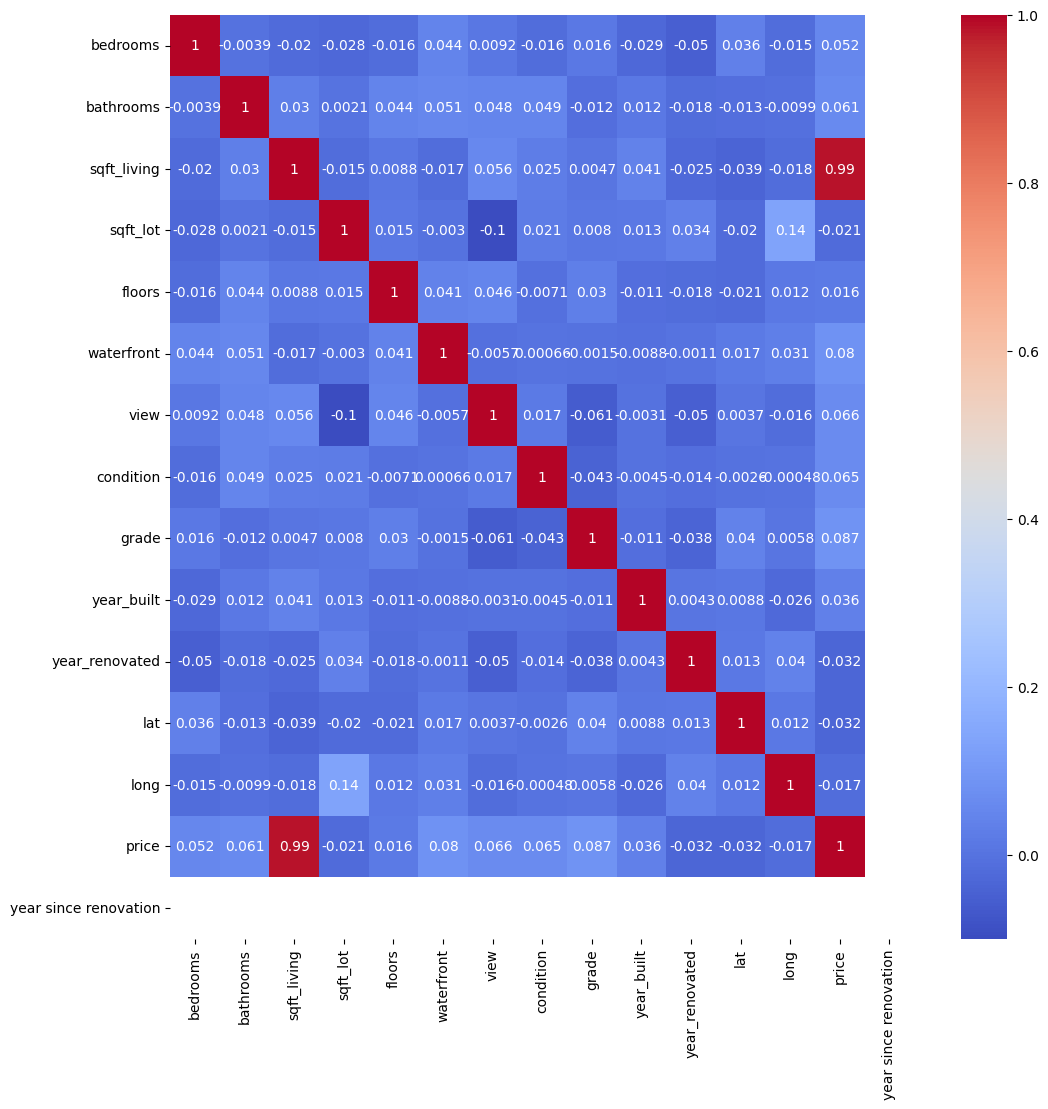

In [ ]:
#sns heatmap
plt.figure(figsize=(12,12))
sns.heatmap(data=correlations1, cmap="coolwarm", annot=True)

In [ ]:
house_prices_data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,year_built,year_renovated,lat,long,price,year since renovation
0,3,1,2803,1153,1,0,0,3,9,2003,1970-01-01 00:00:00.000000000,47.660671,-121.785347,835016.23,55
1,5,3,783,9762,1,0,2,4,4,2019,1970-01-01 00:00:00.000000000,47.681937,-122.151515,326073.09,55
2,3,3,3412,2842,2,0,3,4,9,1961,1970-01-01 00:00:00.000001962,47.182798,-121.792089,1025404.09,55
3,2,3,2222,9020,2,1,2,4,4,2008,1970-01-01 00:00:00.000001962,47.440995,-121.871224,758764.79,55
4,4,1,4713,1584,2,0,3,4,5,1987,1970-01-01 00:00:00.000000000,47.701306,-122.416623,1314784.23,55


In [ ]:
y=house_prices_data['price']
x=house_prices_data.drop('price', axis=1)
x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,year_built,year_renovated,lat,long,year since renovation
0,3,1,2803,1153,1,0,0,3,9,2003,1970-01-01 00:00:00.000000000,47.660671,-121.785347,55
1,5,3,783,9762,1,0,2,4,4,2019,1970-01-01 00:00:00.000000000,47.681937,-122.151515,55
2,3,3,3412,2842,2,0,3,4,9,1961,1970-01-01 00:00:00.000001962,47.182798,-121.792089,55
3,2,3,2222,9020,2,1,2,4,4,2008,1970-01-01 00:00:00.000001962,47.440995,-121.871224,55
4,4,1,4713,1584,2,0,3,4,5,1987,1970-01-01 00:00:00.000000000,47.701306,-122.416623,55


In [ ]:
vif = variance_inflation_factor

In [ ]:
x = add_constant(x)
vif_data = pd.DataFrame()
vif_data['FEATURE'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif_data.head()

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
x= x.drop('year_renovated', axis = 1)
vif_data=pd.DataFrame()
vif_data["Feature"]= x.columns
vif_data["VIF"]=[variance_inflation_factor(x.values, i) for i in range (x.shape[1])]
print(vif_data)


                  Feature            VIF
0                bedrooms       1.006126
1               bathrooms       1.010230
2             sqft_living       1.008683
3                sqft_lot       1.031122
4                  floors       1.008089
5              waterfront       1.008007
6                    view       1.021836
7               condition       1.005825
8                   grade       1.008833
9              year_built       1.004024
10                    lat       1.005990
11                   long       1.021304
12  year since renovation  244986.439558


C:\Users\Sally\AppData\Local\Temp\ipykernel_5492\71638438.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Variable', y='Value', data=house_prices_melted, palette='coolwarm')


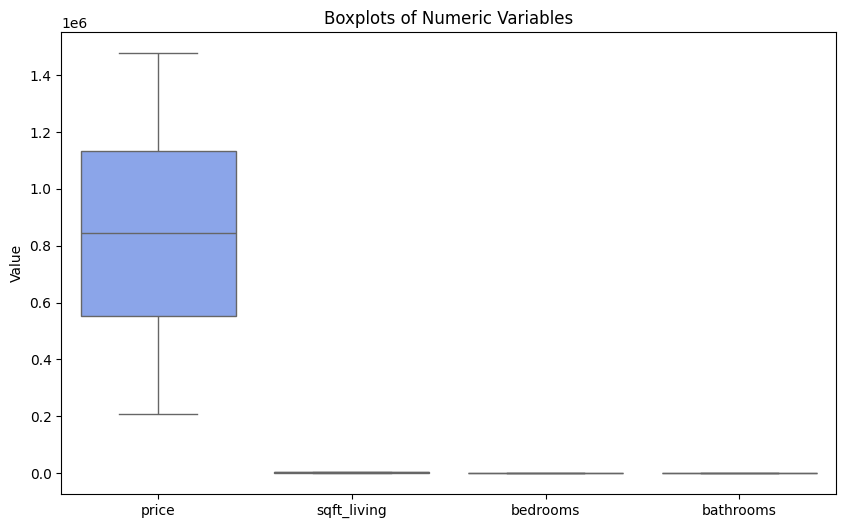

In [ ]:
numeric_cols = ['price', 'sqft_living', 'bedrooms', 'bathrooms']

# Melt data into long format
house_prices_melted = house_prices_data[numeric_cols].melt(var_name='Variable', value_name='Value')

# Plot all boxplots in one chart
plt.figure(figsize=(10, 6))
sns.boxplot(x='Variable', y='Value', data=house_prices_melted, palette='coolwarm')
plt.title('Boxplots of Numeric Variables')
plt.xlabel('')
plt.ylabel('Value')
plt.show()

--- they are of differents scales hence we use logarithmic scaling where variables are standardized and has a scale of between o and 1

#### Standard scaler

we melt to bring them all to the same space

In [ ]:
min_max_scaler = MinMaxScaler()
data_scaled = min_max_scaler.fit_transform(x)
scaled_df = pd.DataFrame(data_scaled)
scaled_melted = scaled_df.melt(var_name='variable', value_name='scaled value')

plt.figure(figsize= (10,6))
sns.boxplot(x = 'variable' , y= 'scaled value',data= scaled_melted, palette = 'viridis')
plt.title('standardized scales boxplots [0-1]')
plt.show()


DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int32DType'>)

In [ ]:
price_normalized = np.log(y)
y_transformed = pd.Series(price_normalized)
print (y_transformed)

0      13.635206
1      12.694877
2      13.840597
3      13.539447
4      14.089183
         ...    
995    13.453856
996    13.994396
997    13.443744
998    12.987000
999    12.420902
Name: price, Length: 1000, dtype: float64


In [ ]:
model = sm.ols(data_scaled, data = scaled_df).fit()
print(model.summary())

AttributeError: module 'statsmodels.api' has no attribute 'ols'